In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly
from sqlalchemy import create_engine

In [4]:
def connect_to_db():
    host = os.environ.get("DB_HOST")
    user = os.environ.get("DB_USER")
    password = os.environ.get("DB_PASSWORD")
    db= "CPAP"

    conn = create_engine(f"postgresql://{user}:{password}@{host}:5432/{db}")
    return conn

conn = connect_to_db()

Hours Slept Trending

In [20]:
hrsquery = """SELECT DISTINCT 
        CAST(session_start as DATE)
        , ROUND(usage_sec / 3600, 2) as "Hours Slept"
        FROM event_history
        ORDER BY session_start"""

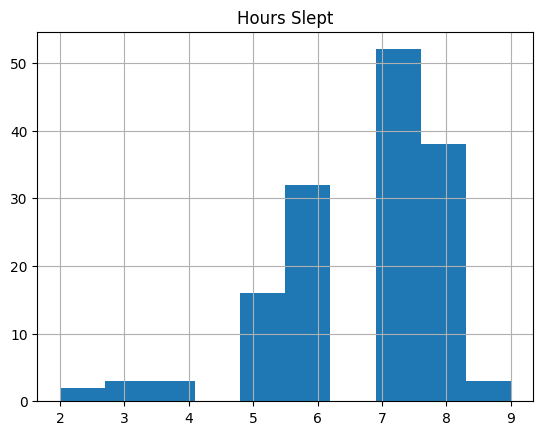

In [21]:
df = pd.read_sql_query(hrsquery, conn)
df.hist()
plt.show()

Events Per Session Trending with temperature

In [60]:
eventsq = """SELECT DISTINCT 
        CAST(session_start as DATE) as date
        , COUNT(category) events
        FROM event_history
        WHERE CAST(session_start as DATE) BETWEEN '2022-11-08' and '2023-02-04'
		GROUP BY CAST(session_start as DATE)
		ORDER BY CAST(session_start as DATE)
        """

temps = """select 
date
,ROUND(AVG(fahrenheit_tavg)) temp
from locationweatherhist_mat
group by date
order by date asc"""

locq = """select 
cast(date as date)::date date
,count(address) as places
from locationhistory
group by cast(date as date)
order by cast(date as date) asc"""

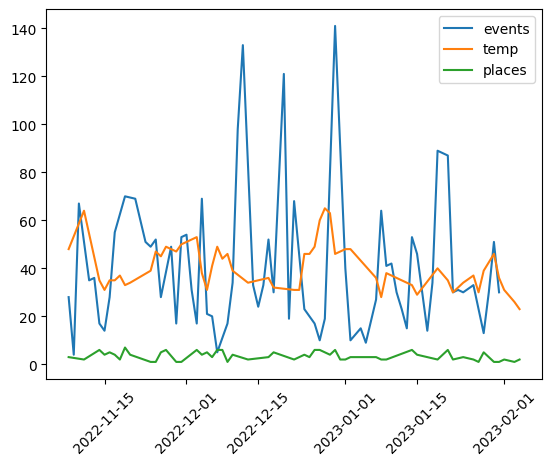

In [65]:
dfs = pd.read_sql_query(eventsq, conn)
dft = pd.read_sql_query(temps, conn)
dfl = pd.read_sql_query(locq, conn)
dfs["date"] = pd.to_datetime(dfs["date"])
dft["date"] = pd.to_datetime(dft["date"])
dfl["date"] = pd.to_datetime(dfl["date"])
date = dfs["date"]
events = dfs["events"]
temp = dft["temp"]
tdate = dft["date"]
places = dfl["places"]
pdate = dfl["date"]
plt.plot(date, events, label = "events")
plt.plot(tdate, temp, label = "temp")
plt.plot(pdate, places, label = "places")
plt.xticks(rotation=45)
plt.legend()
plt.show()